<a href="https://colab.research.google.com/github/yuting-tseng/stock_predict/blob/master/stock_AAPL_201901.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Finance Predict

ref: 
1. [ML預測股價](https://www.finlab.tw/%E8%B6%85%E7%B0%A1%E5%96%AE-Machine-Learning-%E9%A0%90%E6%B8%AC%E8%82%A1%E5%83%B9/)
2. [stock module github](https://github.com/WillKoehrsen/Data-Analysis/tree/master/stocker)

In [1]:
!git clone https://github.com/koreal6803/Stocker.git
!pip install -r Stocker/requirements.txt

Cloning into 'Stocker'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10
Unpacking objects: 100% (10/10), done.
    100% |████████████████████████████████| 15.0MB 2.1MB/s 
    100% |████████████████████████████████| 17.2MB 1.8MB/s 
    100% |████████████████████████████████| 55.1MB 661kB/s 
    100% |████████████████████████████████| 61kB 24.1MB/s 
    100% |████████████████████████████████| 2.4MB 6.9MB/s 
    100% |████████████████████████████████| 102kB 29.3MB/s 
  Running setup.py bdist_wheel for fbprophet ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/71/b3/f1/e6668a53f3d537b5c160dbc13c7d463893a28c67d6c9c4fe20
  Running setup.py bdist_wheel for inflection ... - \ done
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built fbprophet inflection
thinc 6.12.1 has requirement wrapt<1.11.0,>=1.10.0, but you'll have wrapt 1.11.0 which i

In [0]:
import warnings
import pandas as pd
from Stocker.stocker import Stocker
import pandas_datareader.data as web

warnings.filterwarnings('ignore')

In [12]:
# df = web.DataReader('AAPL', 'stooq')
# price = df['Close'].squeeze().iloc[::-1]

df = web.DataReader('AAPL', 'yahoo')
price = df['Adj Close'].squeeze()
price.head()

Date
2010-01-04    20.473503
2010-01-05    20.508902
2010-01-06    20.182680
2010-01-07    20.145369
2010-01-08    20.279305
Name: Adj Close, dtype: float64

In [7]:
tsmc = Stocker(price)

the stock Stocker Initialized. Data covers 2010-01-04 00:00:00 to 2019-01-23 00:00:00.


Predicted Price on 2019-04-23 00:00:00 = $133.67


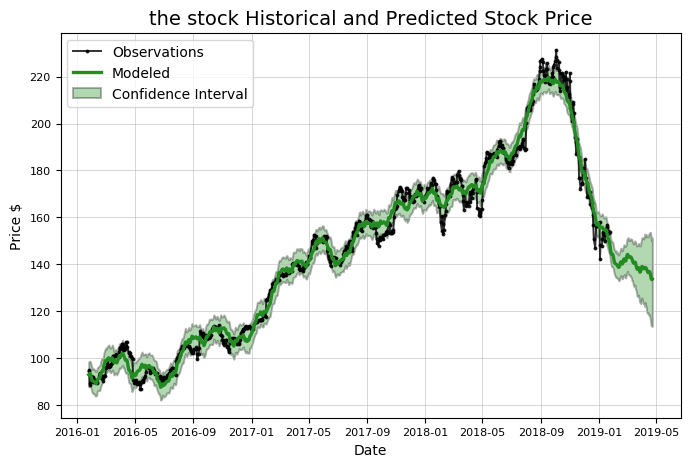

In [8]:
model, model_data = tsmc.create_prophet_model(days=90)


Prediction Range: 2018-03-31 00:00:00 to 2019-01-23 00:00:00.

Predicted price on 2019-03-29 00:00:00 = $209.74.
Actual price on    2019-01-23 00:00:00 = $153.92.

Average Absolute Error on Training Data = $3.46.
Average Absolute Error on Testing  Data = $20.15.

When the model predicted an increase, the price increased 56.00% of the time.
When the model predicted a  decrease, the price decreased  48.10% of the time.

The actual value was within the 80% confidence interval 24.39% of the time.


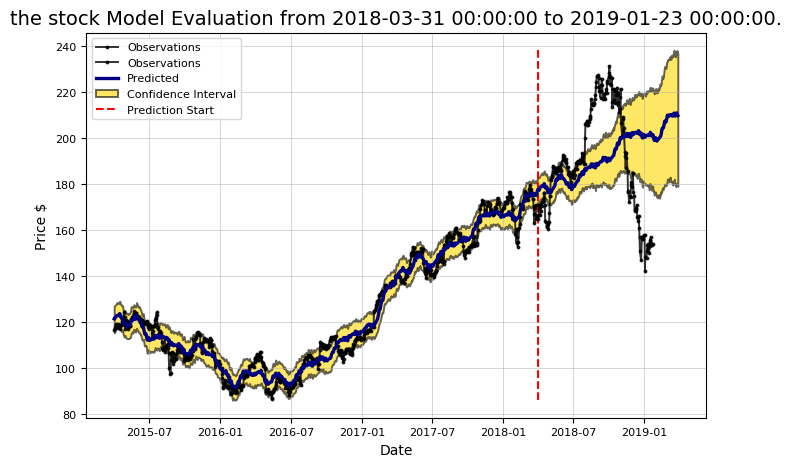

In [9]:
tsmc.evaluate_prediction(start_date='2018-03-31')

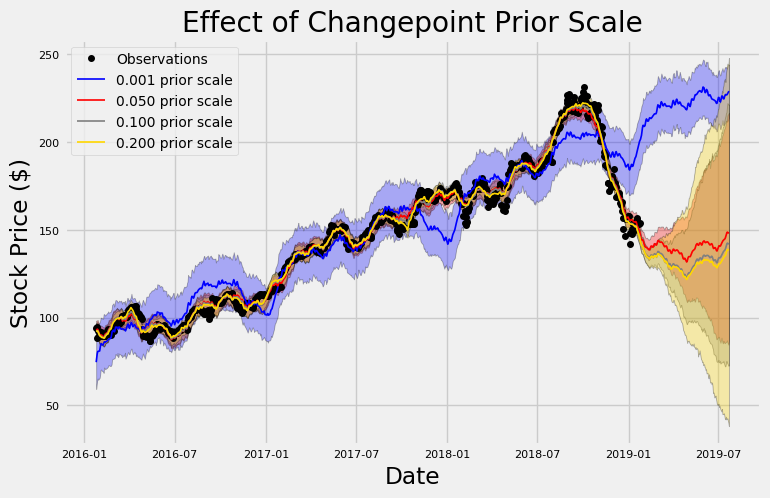

In [10]:
# 我們可以調整短中長期的參數，讓它預測短中長期股價
tsmc.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Prediction Range: 2018-01-23 00:00:00 to 2019-01-23 00:00:00.

Predicted price on 2019-01-22 00:00:00 = $215.93.
Actual price on    2019-01-22 00:00:00 = $153.30.

Average Absolute Error on Training Data = $1.79.
Average Absolute Error on Testing  Data = $19.79.

When the model predicted an increase, the price increased 50.33% of the time.
When the model predicted a  decrease, the price decreased  45.45% of the time.

The actual value was within the 80% confidence interval 78.88% of the time.


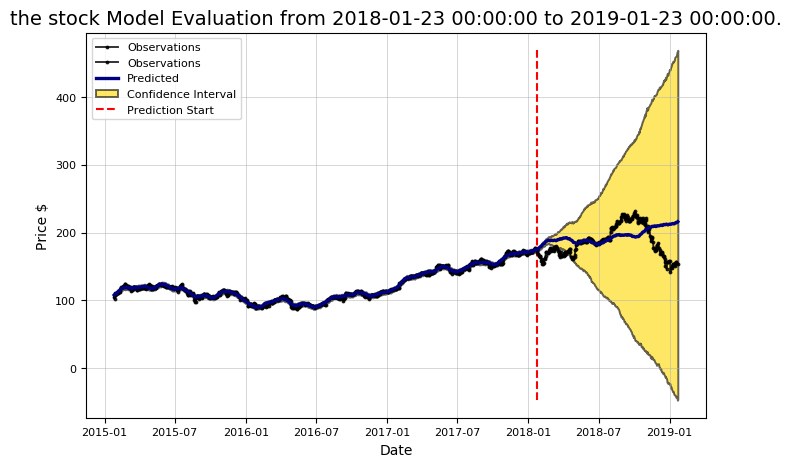

In [11]:
# 我們藉由上述的參數枚舉，可以知道哪一個參數（changepoint_prior）是最好的 我們可以藉由執行predict_future 來預測股價
tsmc.evaluate_prediction()